In [2]:
%matplotlib inline

In [3]:
import stream as st

In [4]:
st.__version__

'0.3.1'

### Read in data

In [5]:
adata=st.read(file_name='./data_Nestorowa.tsv.gz')

#### read in cell labels and label color

if cell label file or cell color file is not provided, please simply run:

#'unknown' will be added as the default label for all cells  
st.add_cell_labels(adata) 

#'random color will be generated for each cell label  
st.add_cell_colors(adata) 

In [6]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

#### other useful preprocessing steps when dealing with raw-count data

#Normalize gene expression based on library size  
st.normalize_per_cell(adata)

#Logarithmize gene expression  
st.log_transform(adata) 

#Remove mitochondrial genes  
st.remove_mt_genes(adata) 

#Filter out cells  
st.filter_cells(adata) 

Filter out genes

In [7]:
st.filter_genes(adata,min_num_cells = max(5,int(round(adata.shape[0]*0.001))),
                min_pct_cells = None,expr_cutoff = 1)

filter genes based on min_num_cells
after filtering out low-expressed genes: 
1656 cells, 4762 genes


239 variable genes are selected


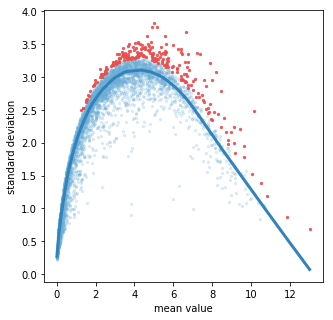

In [8]:
st.select_variable_genes(adata)

In [9]:
st.dimension_reduction(adata)

44 cpus are being used ...


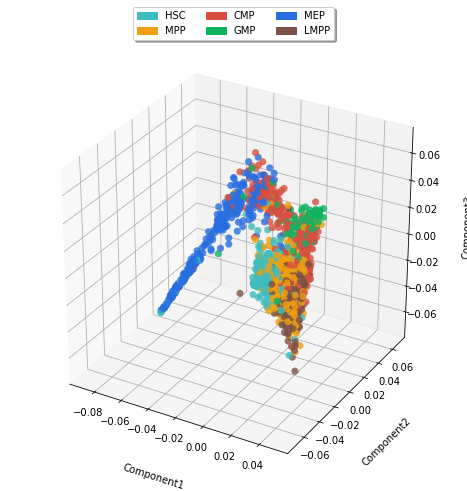

In [10]:
st.plot_dimension_reduction(adata)

In [11]:
st.seed_elastic_principal_graph(adata)

Seeding initial elastic principal graph...
Clustering...
Affinity propagation ...
The number of initial nodes is 27
Calculatng minimum spanning tree...
Number of initial branches: 13


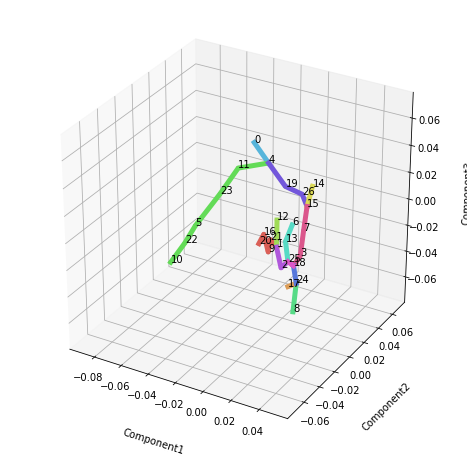

In [12]:
st.plot_branches(adata)

In [13]:
st.elastic_principal_graph(adata)

epg_n_nodes is too small. It is corrected to the initial number of nodes plus incr_n_nodes
Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 57 nodes on 1656 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 
50
 
51
 
52
 
53
 
54
 
55
 
56
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||57
	
0.0001008
	
57
	
56
	
51
	
2
	
0
	
0
	
6.104e-05
	
5.878e-05
	
0.9663
	
0.9676
	
3.586e-05
	
3.899e-06
	
0.0002222
	
0.01267
	
0


44.51 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 5


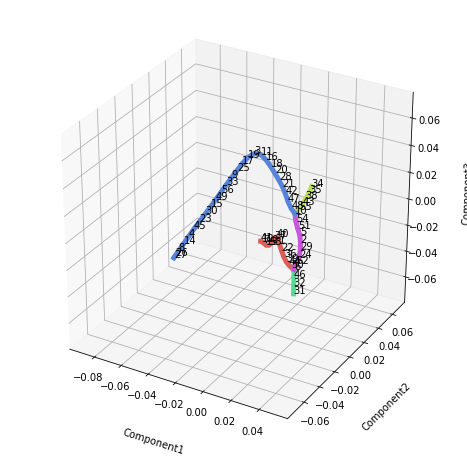

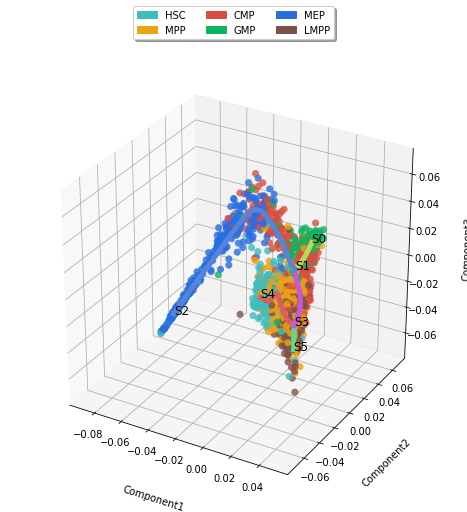

In [14]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 87 nodes on 1656 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 
80
 
81
 
82
 
83
 
84
 
85
 
86
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||87
	
6.702e-05
	
87
	
86
	
81
	
2
	
0
	
0
	
4.285e-05
	
4.116e-05
	
0.9764
	
0.9773
	
1.844e-05
	
5.73e-06
	
0.0004985
	
0.04337
	
0


10.3 sec elapsed

Number of branches after optimizing branching: 5


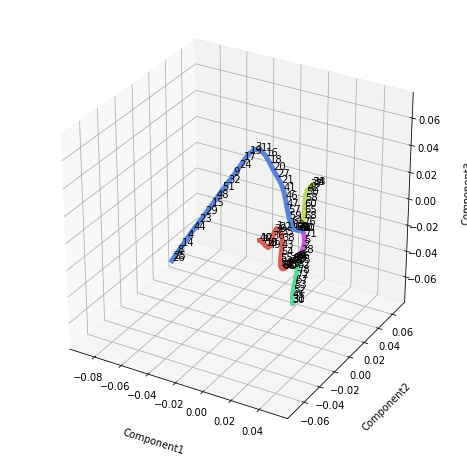

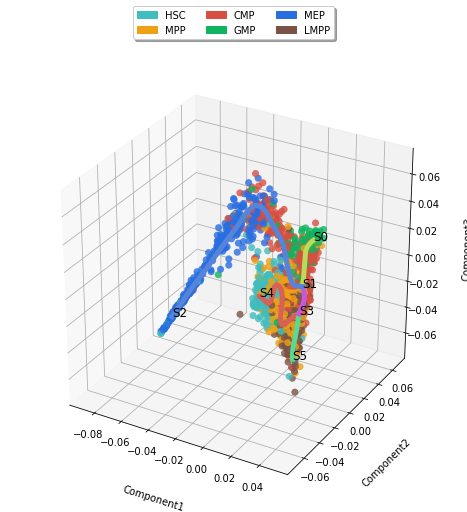

In [15]:
st.optimize_branching(adata,reset=True)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 5


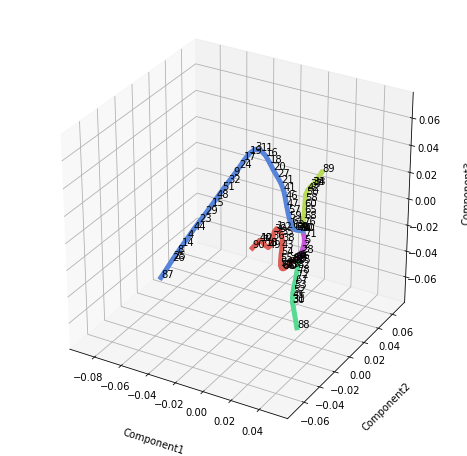

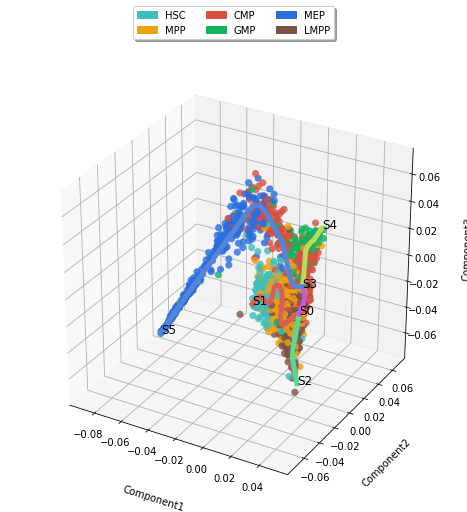

In [16]:
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

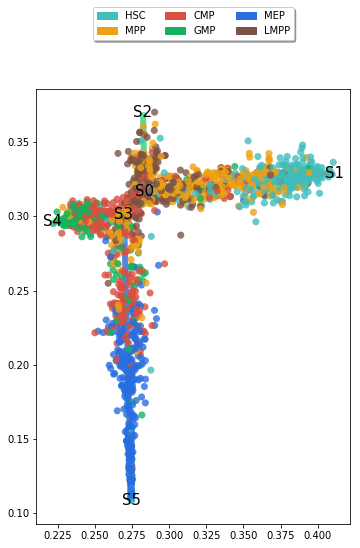

In [17]:
st.plot_flat_tree(adata)

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/huidong_py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


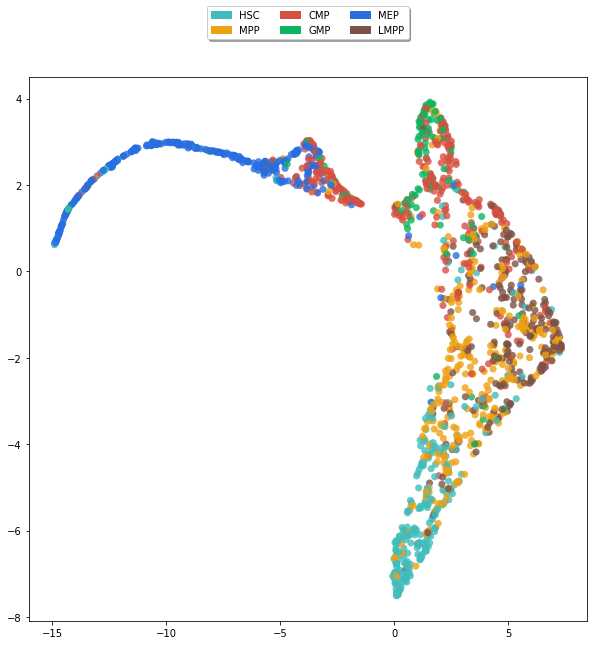

In [18]:
st.plot_visualization_2D(adata,use_precomputed=False)

Importing precomputed umap visualization ...


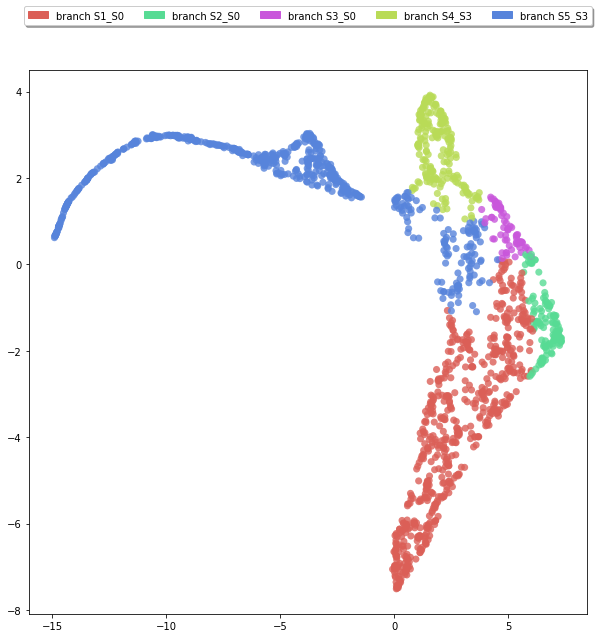

In [19]:
st.plot_visualization_2D(adata,color_by='branch',fig_legend_ncol=6)

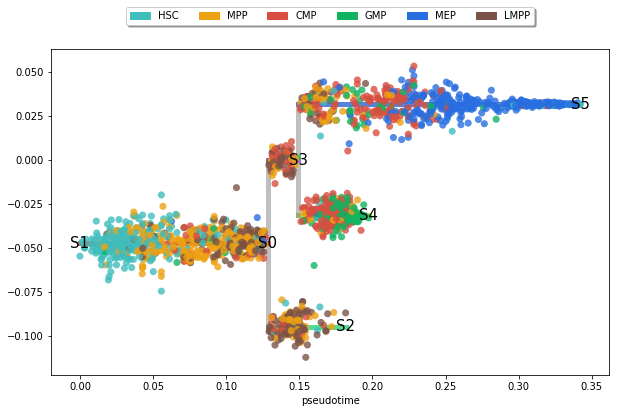

In [20]:
st.subwaymap_plot(adata,percentile_dist=100,root='S1',fig_legend_ncol=6) 

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/huidong_py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


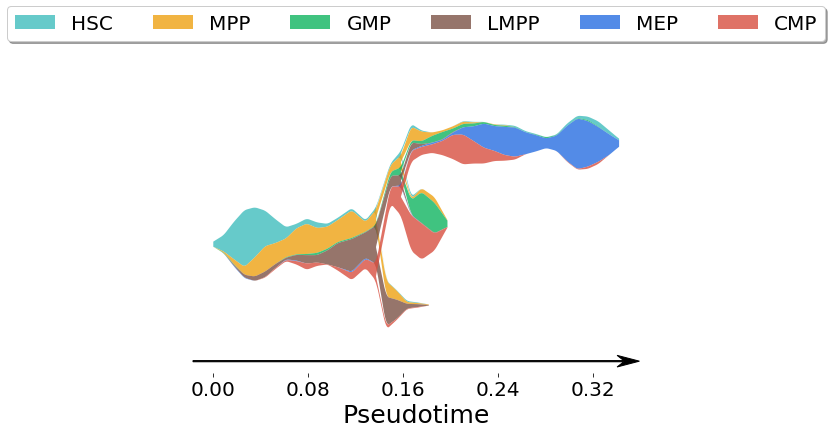

In [21]:
st.stream_plot(adata,root='S1',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.2)

#### The order between horizontal branches from the same parent node has no meaning

#### Users can specify the order preference of nodes themselves

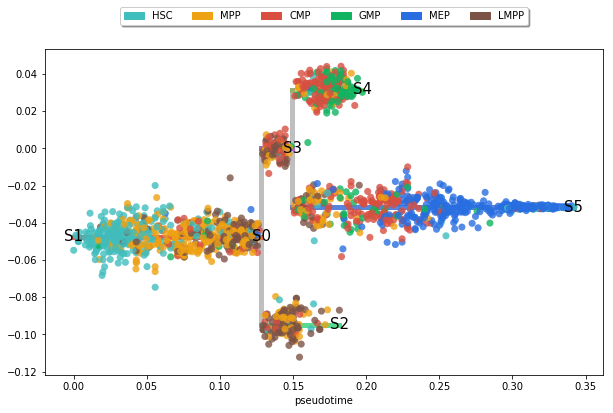

In [22]:
st.subwaymap_plot(adata,percentile_dist=100,root='S1',fig_legend_ncol=6,preference=['S4','S5']) 

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/huidong_py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


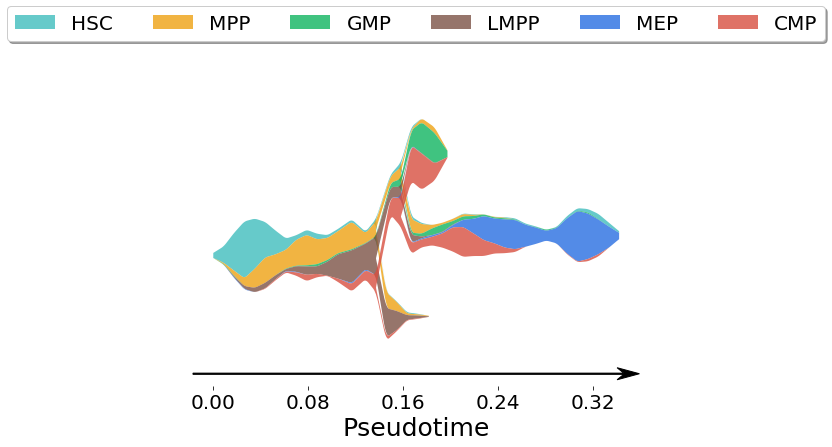

In [23]:
st.stream_plot(adata,root='S1',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.2,preference=['S4','S5'])

In [24]:
st.detect_transistion_genes(adata,root='S1',preference=['S4','S5'])

Minimum number of cells expressing genes: 5


In [25]:
st.detect_de_genes(adata,root='S1',preference=['S4','S5'])

Minimum number of cells expressing genes: 5
Importing precomputed scaled gene expression matrix ...


In [26]:
st.detect_leaf_genes(adata,root='S1',preference=['S4','S5'])

Minimum number of cells expressing genes: 5
Importing precomputed scaled gene expression matrix ...


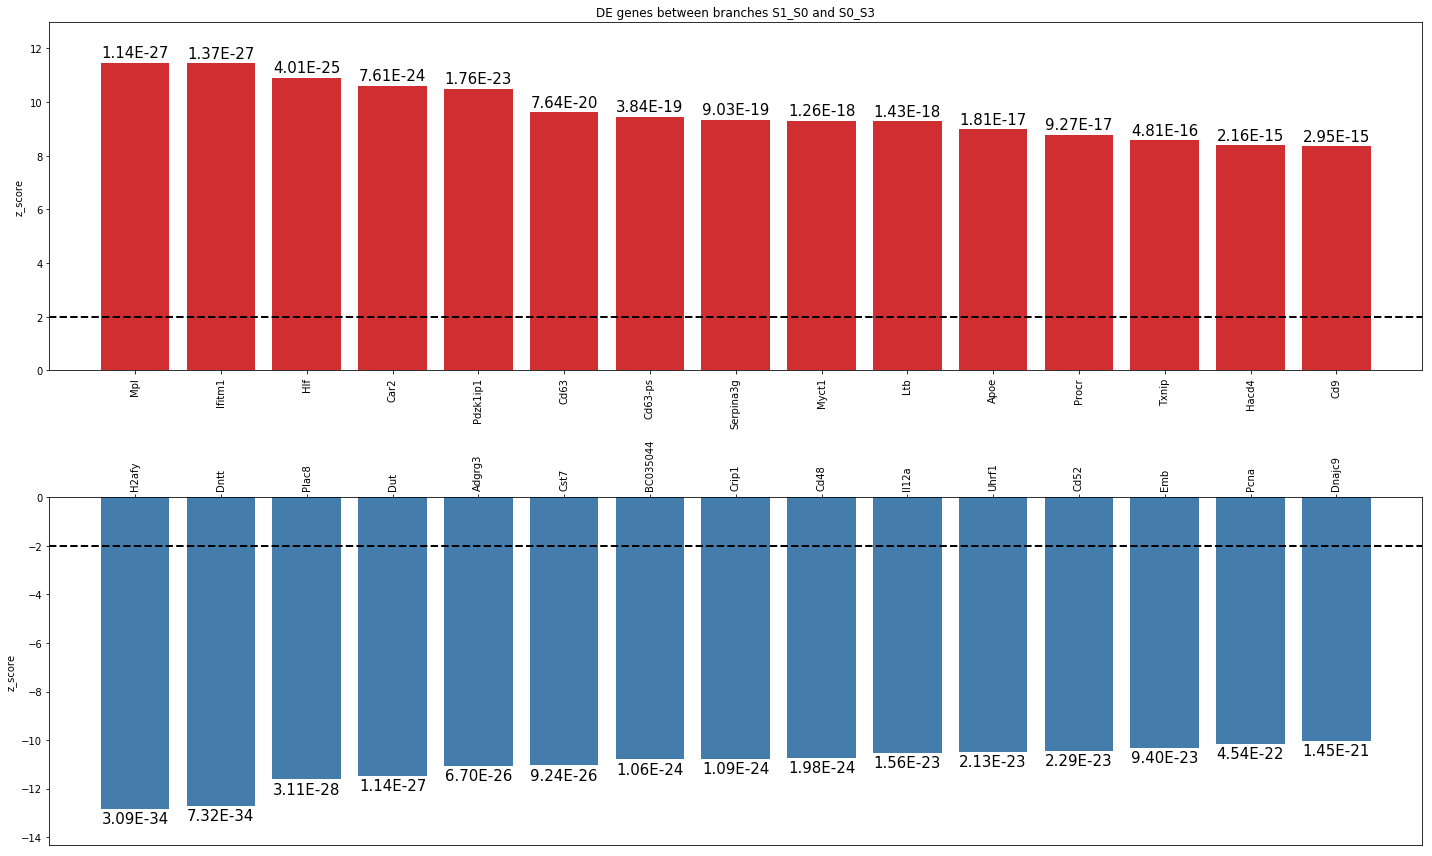

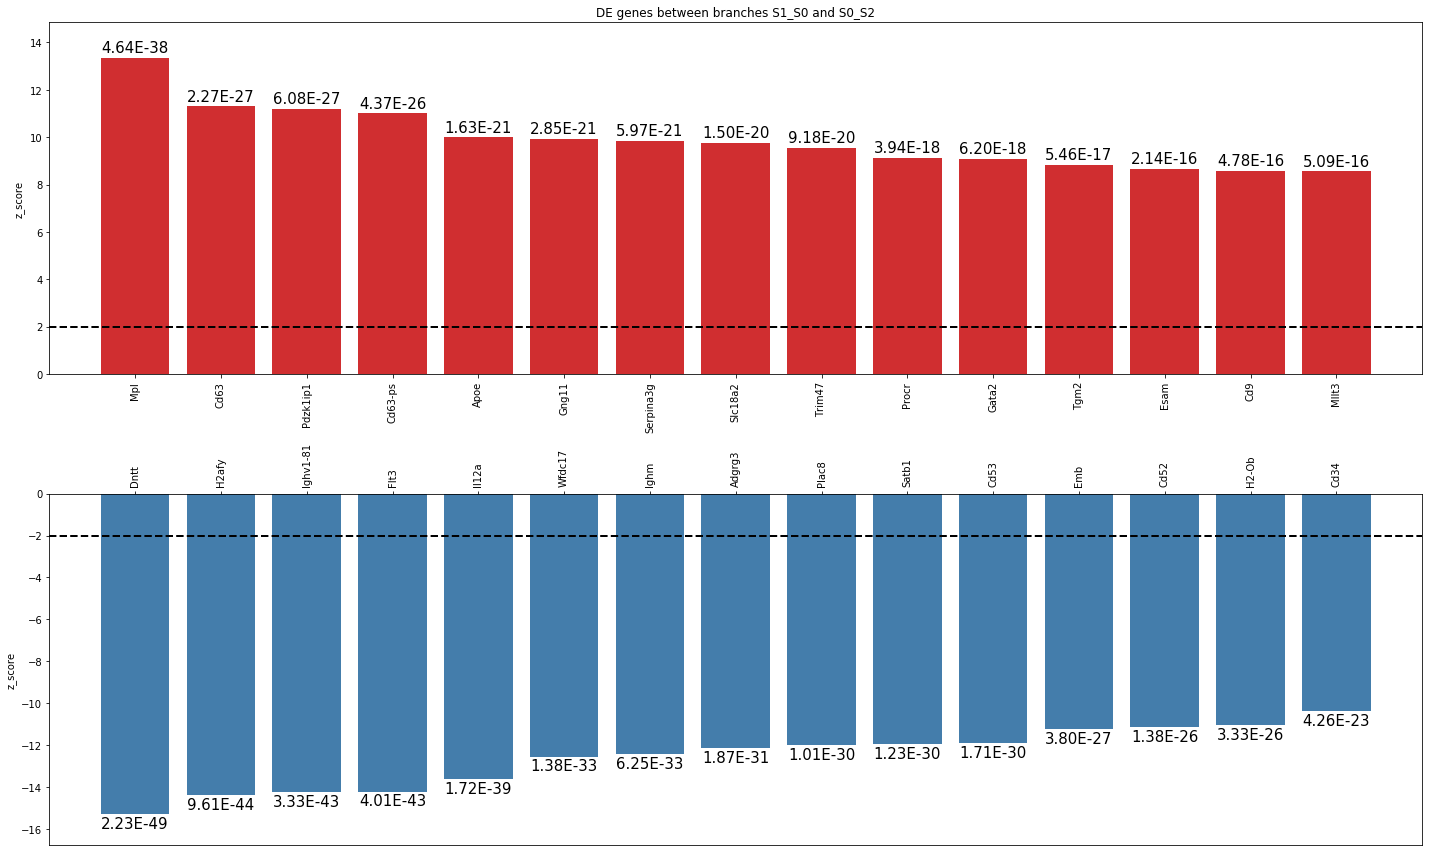

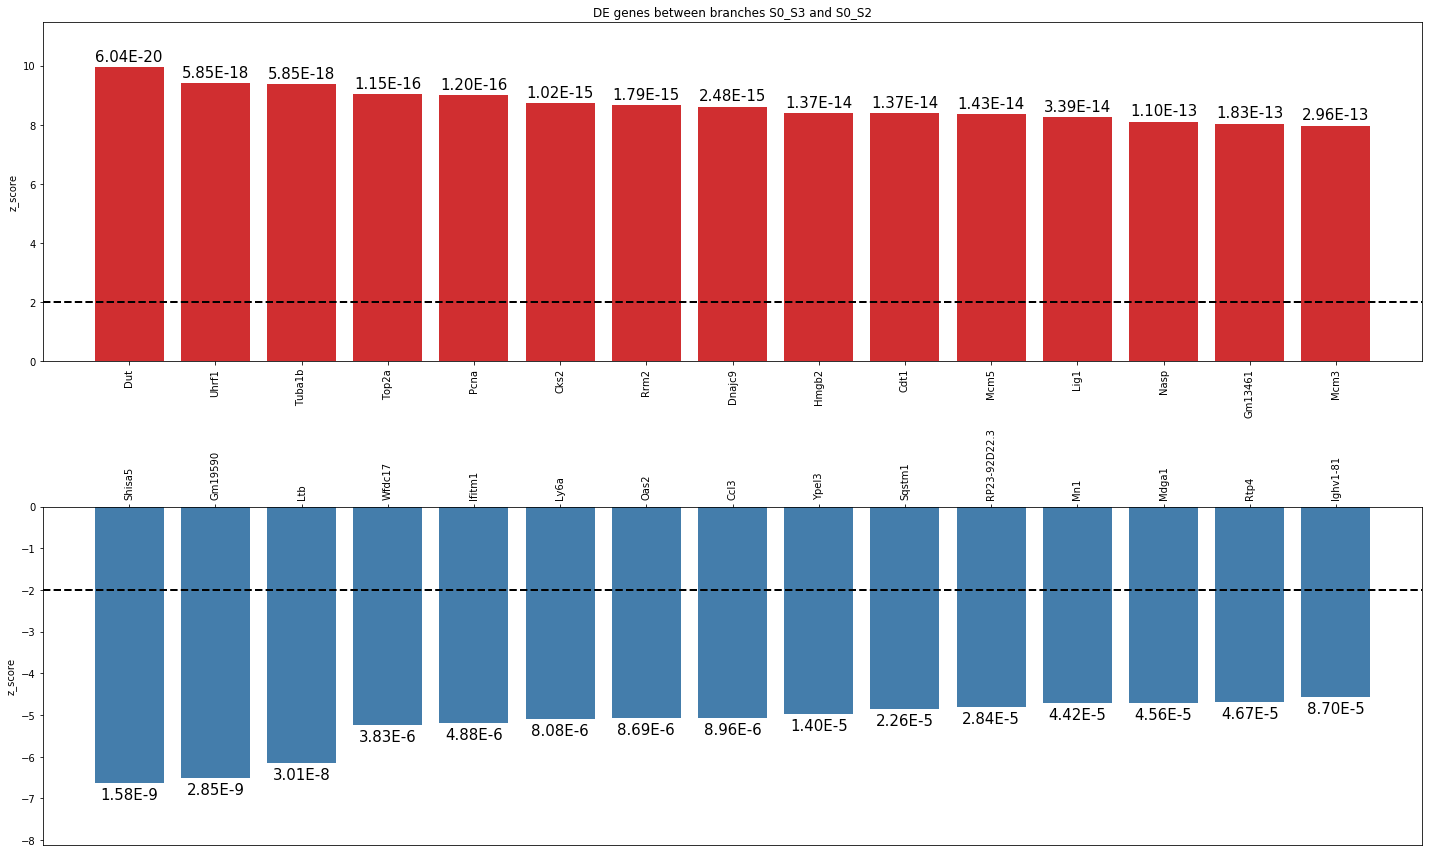

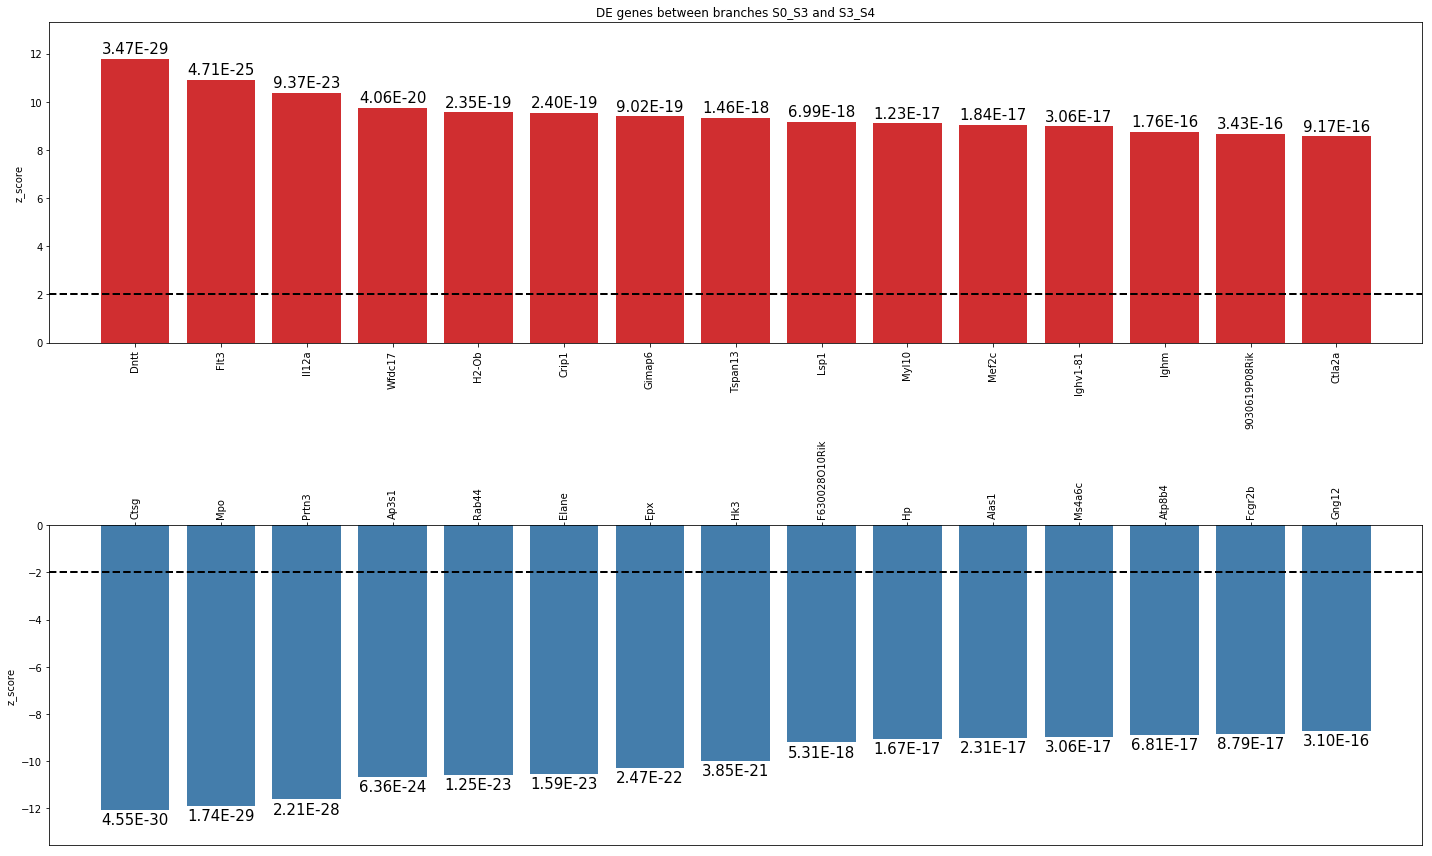

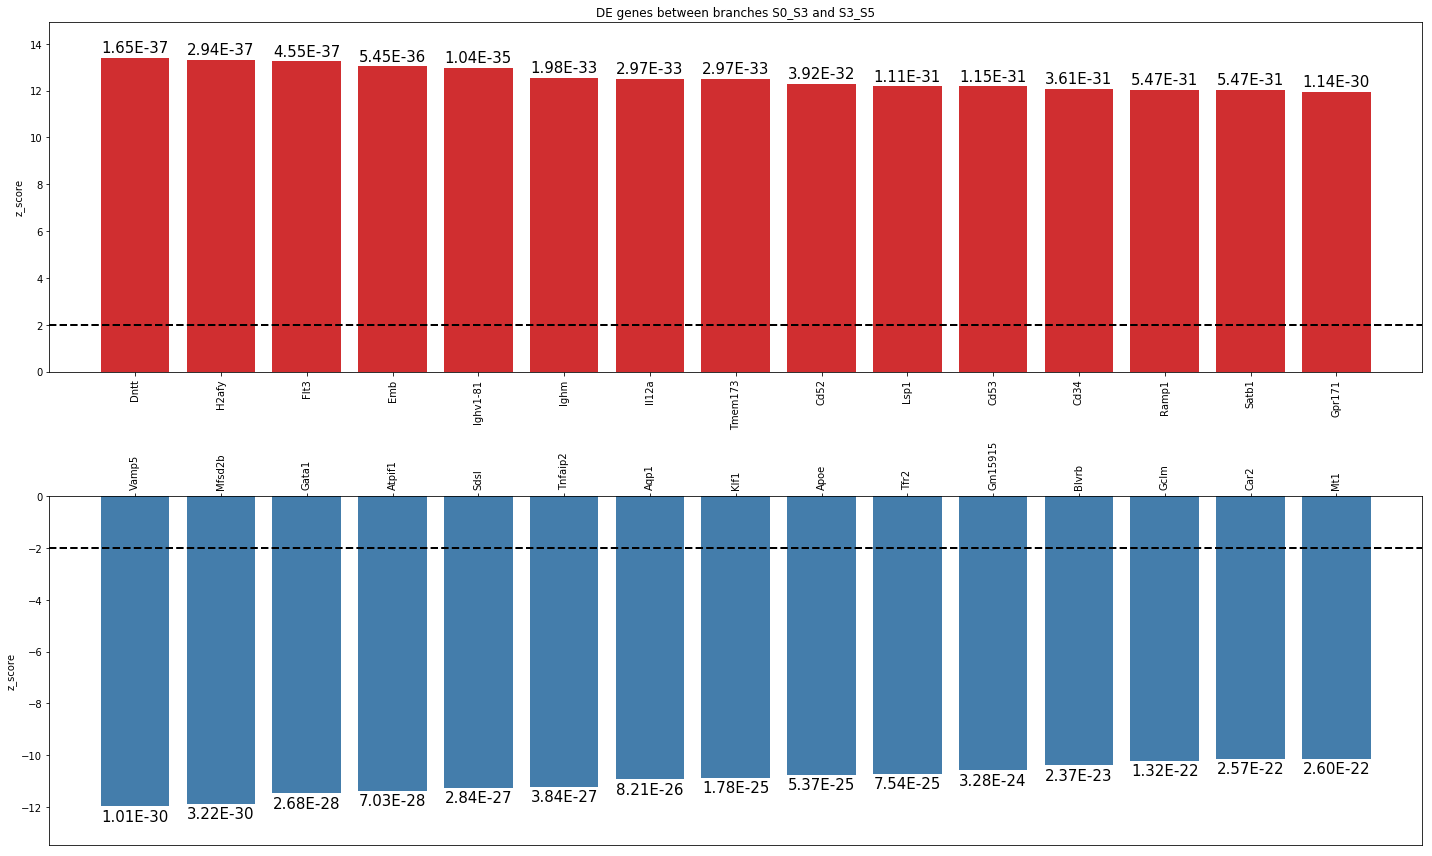

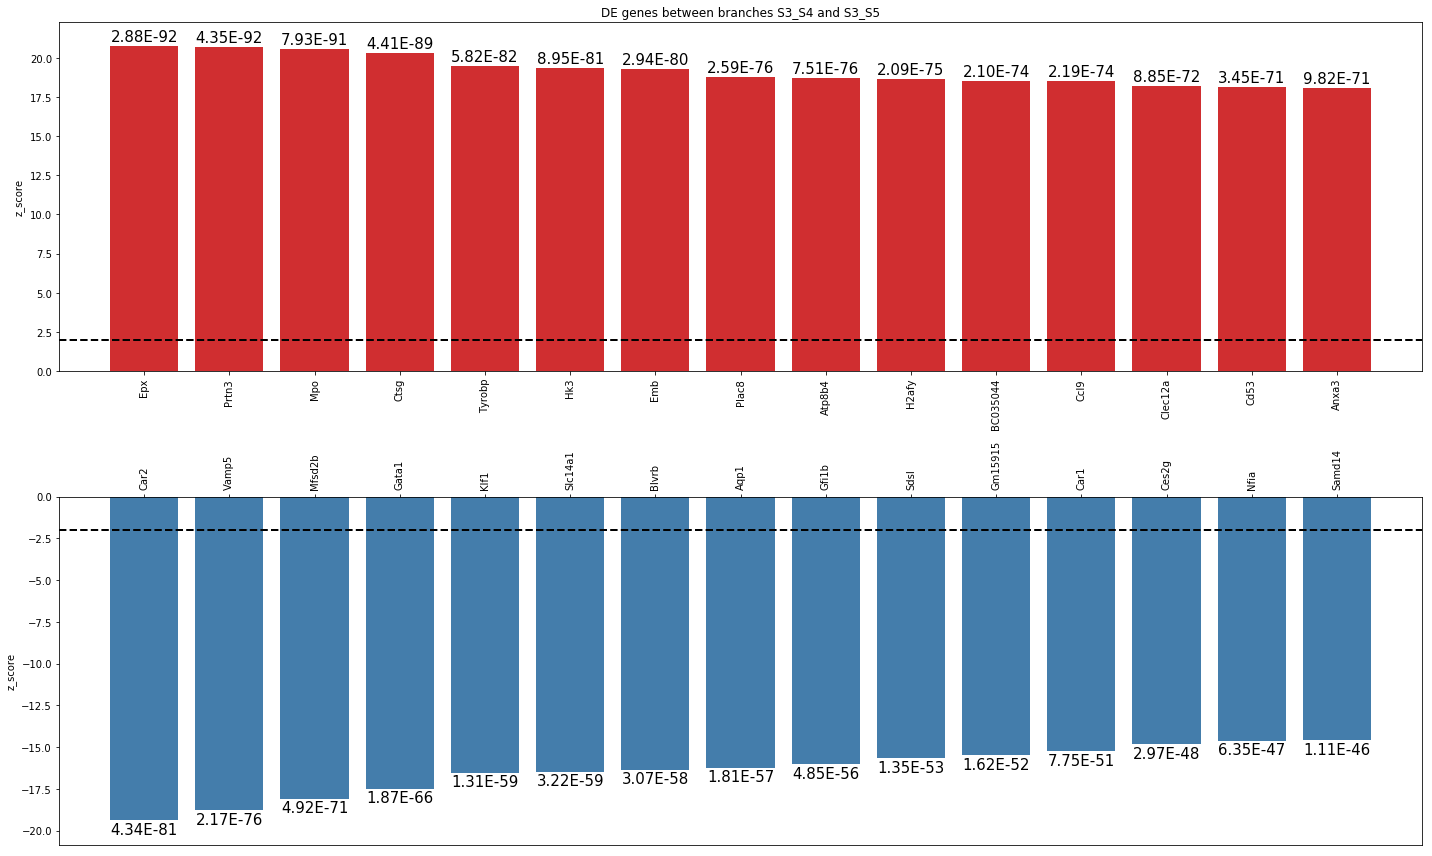

In [27]:
st.plot_de_genes(adata)

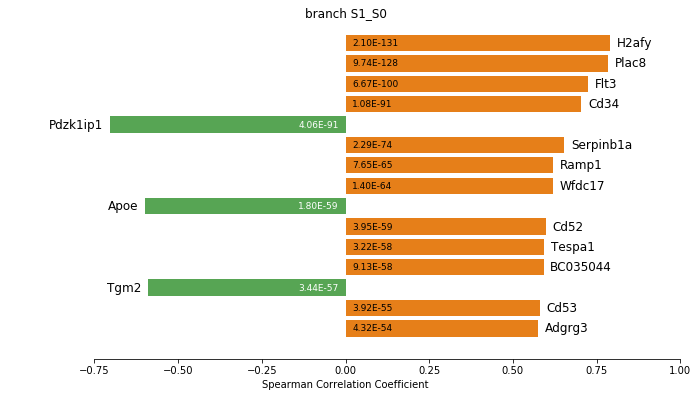

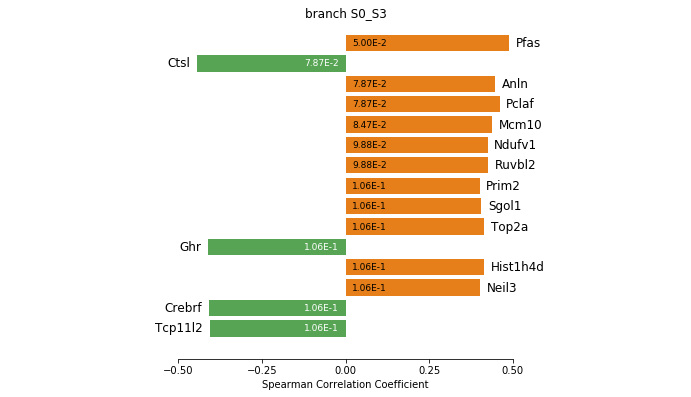

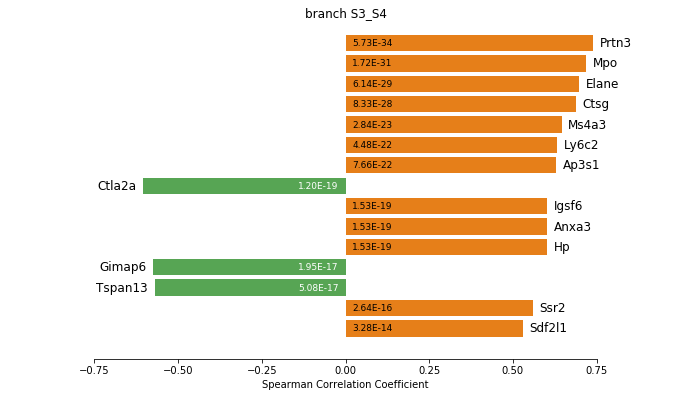

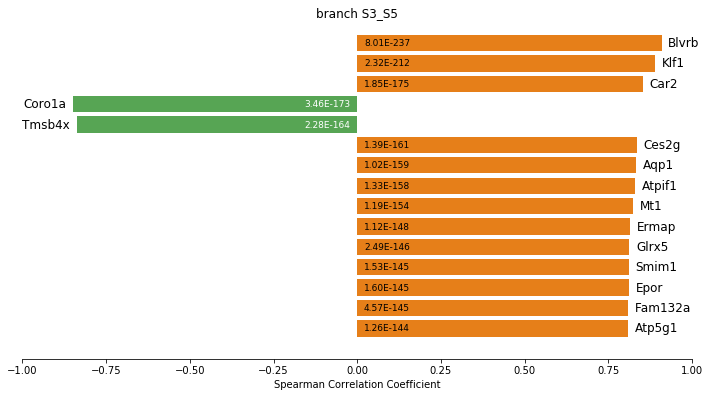

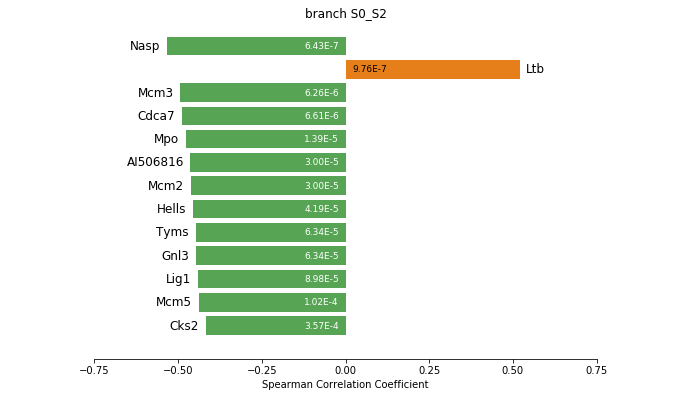

In [28]:
st.plot_transition_genes(adata)

In [29]:
adata.uns['leaf_genes_all']

,zscore,H_statistic,H_pvalue,S1S0_pvalue,S3S4_pvalue,S3S5_pvalue,S0S2_pvalue
Mfsd2b,1.72663,809.244,4.27982e-175,4.76169e-210,3.39858e-118,Null,1.80633e-105
Gata1,1.72564,760.536,1.56622e-164,1.17325e-187,1.05915e-108,Null,1.02264e-99
Mpl,1.68169,754.626,2.99574e-163,Null,1.80422e-146,3.20442e-180,2.05186e-53
Vamp5,1.56731,720.931,6.07203e-156,2.13905e-132,3.39236e-136,Null,2.16952e-107
Epx,1.72955,716.155,6.59242e-155,1.32885e-197,Null,1.90727e-173,2.40849e-97
Emb,-1.56389,711.027,8.52847e-154,2.46608e-91,9.72506e-152,Null,5.92717e-112
Prtn3,1.54828,706.47,8.30222e-153,1.0457e-80,Null,4.45853e-195,7.05237e-57
Lcp1,-1.72122,666.639,3.5953e-144,6.19033e-144,3.65457e-101,Null,1.90908e-86
Klf1,1.72783,666.415,4.02134e-144,1.99911e-157,1.24109e-90,Null,1.91209e-75
Limd2,-1.70948,647.307,5.58682e-140,1.35828e-155,3.15431e-60,Null,3.86024e-85


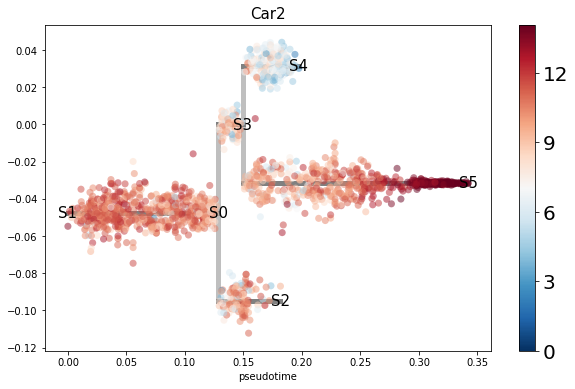

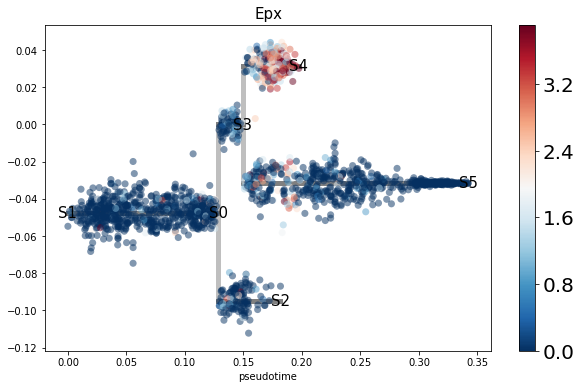

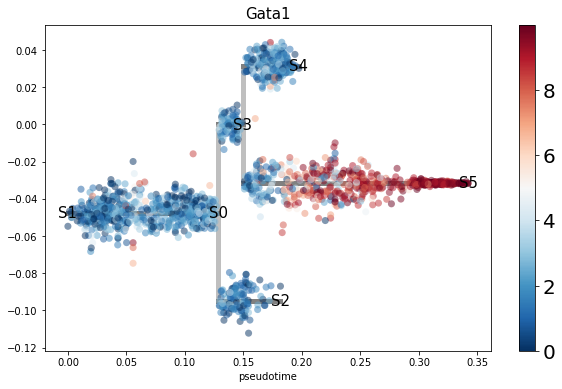

In [30]:
st.subwaymap_plot_gene(adata,percentile_dist=100,root='S1',preference=['S4','S5'],genes=['Gata1','Car2','Epx']) 

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/huidong_py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


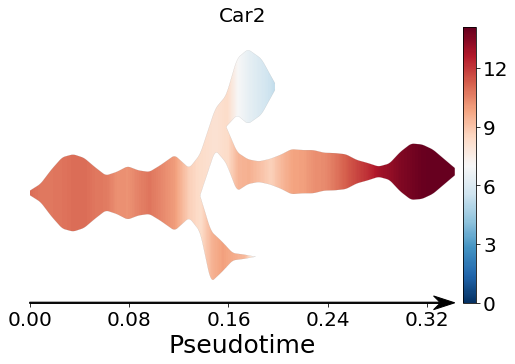

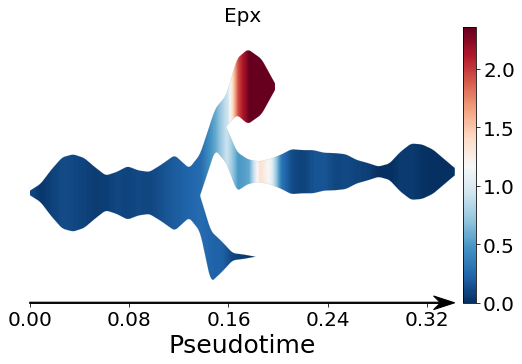

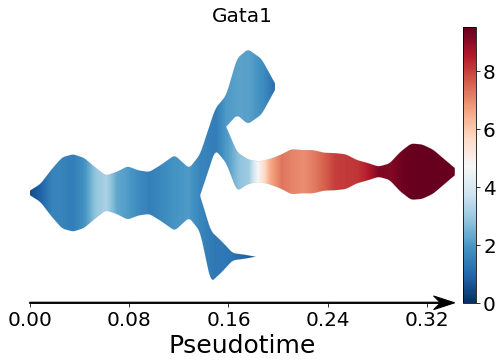

In [31]:
st.stream_plot_gene(adata,root='S1',fig_size=(8,8),factor_min_win=1.2,preference=['S4','S5'],genes=['Gata1','Car2','Epx'])

In [32]:
st.write(adata)